In [249]:
# Created by using Google Colab
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

if not os.path.exists('119200063_lutfuorcun_selbasan_cmpe352_hw03_recording.wav'):
    !wget https://github.com/OrcunSelbasan/signal_processing_and_algorithms/raw/main/119200063_lutfuorcun_selbasan_cmpe352_hw03_recording.wav

In [250]:
from thinkdsp import read_wave, UncorrelatedUniformNoise, UncorrelatedGaussianNoise, BrownianNoise, PinkNoise, Wave, Chirp, decorate

# Step-1: Reads recorded wave and creates copies of it
recordingWave = read_wave("119200063_lutfuorcun_selbasan_cmpe352_hw03_recording.wav")
recordingWave = recordingWave.segment(start=0, duration=5.0)
# recordingWave has framerate of 48000 and length of the ys will be 5*48,000
# thus generated noise waves will have duration of 5 seconds and framerate of 48000

# Copies of recording to mix with noises
recordingUU = recordingWave
recordingUG = recordingWave
recordingUGEnhanced = recordingWave
recordingBrownian = recordingWave
recordingPink = recordingWave
recordingChirp = recordingWave

# Step-2: Creates noise signals and converts them to Wave objects
# Creates signals
signalUU = UncorrelatedUniformNoise()
signalUG = UncorrelatedGaussianNoise() 
signalUGEnhanced = UncorrelatedGaussianNoise(amp=5)
signalBrownian = BrownianNoise()
signalPink = PinkNoise()

# Converts signal to wave
waveUU = signalUU.make_wave(duration=5.0, framerate=48000)
waveUG = signalUG.make_wave(duration=5.0, framerate=48000)
waveUGEnhanced = signalUGEnhanced.make_wave(duration=5.0, framerate=48000)
waveBrownian = signalBrownian.make_wave(duration=5.0, framerate=48000)
wavePink = signalPink.make_wave(duration=5.0, framerate=48000)

# Step-3: Adds noise wave to recorded wave (Mixes)
mixUU = recordingUU + waveUU
mixUG = recordingUG + waveUG
mixUGEnhanced = recordingUGEnhanced + waveUGEnhanced
mixBrownian = recordingBrownian+ waveBrownian
mixPink = recordingPink + wavePink

# Step-4: Creates a chirp and adds it to recorded wave
# Creating chirp and adding it to the recorded sound
signalChirp = Chirp(start=220, end=880,)
waveChirp = signalChirp.make_wave(duration=5.0, framerate=48000)
mixChirp = recordingChirp + waveChirp

# Step-5: Creates spectrum for each mix including recorded wave with chirp
specRecording = recordingWave.make_spectrum()
specMixUU = mixUU.make_spectrum()
specMixUG = mixUG.make_spectrum()
specMixUGEnhanced = mixUGEnhanced.make_spectrum()
specMixBrownian = mixBrownian.make_spectrum()
specMixPink = mixPink.make_spectrum()
specMixChirp = mixChirp.make_spectrum()

### **Time Domains**

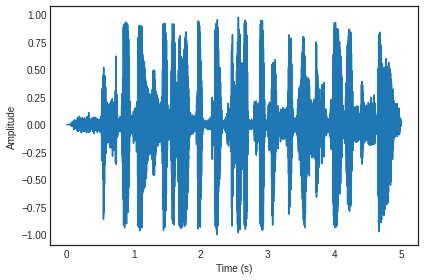

In [251]:
recordingWave.plot()
decorate(xlabel="Time (s)", ylabel="Amplitude")

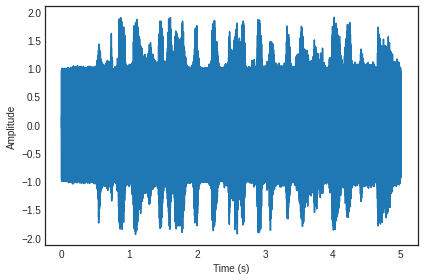

In [252]:
mixUU.plot()
decorate(xlabel="Time (s)", ylabel="Amplitude")

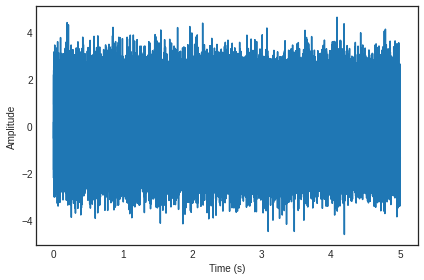

In [253]:
mixUG.plot()
decorate(xlabel="Time (s)", ylabel="Amplitude")

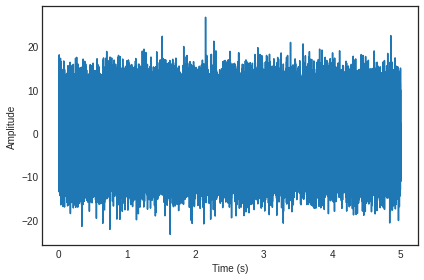

In [254]:
mixUGEnhanced.plot()
decorate(xlabel="Time (s)", ylabel="Amplitude")

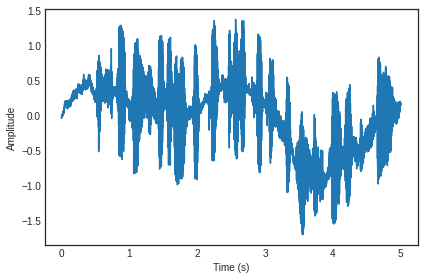

In [255]:
mixBrownian.plot()
decorate(xlabel="Time (s)", ylabel="Amplitude")

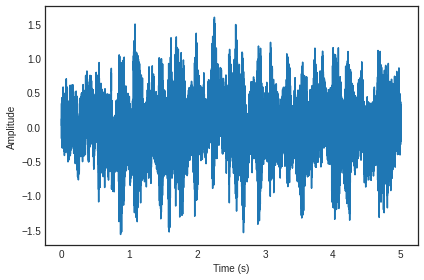

In [256]:
mixPink.plot()
decorate(xlabel="Time (s)", ylabel="Amplitude")

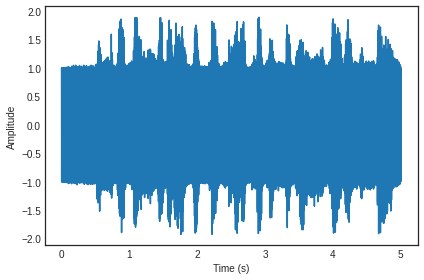

In [257]:
mixChirp.plot()
decorate(xlabel="Time (s)", ylabel="Amplitude")

### **Frequency Domains**

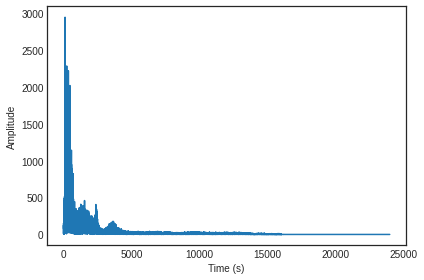

In [258]:
specRecording.plot()
decorate(xlabel="Time (s)", ylabel="Amplitude")

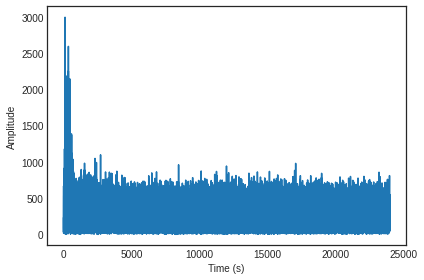

In [259]:
specMixUU.plot()
decorate(xlabel="Time (s)", ylabel="Amplitude")

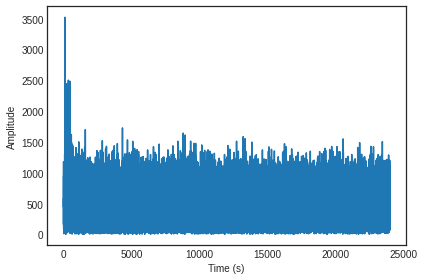

In [260]:
specMixUG.plot()
decorate(xlabel="Time (s)", ylabel="Amplitude")

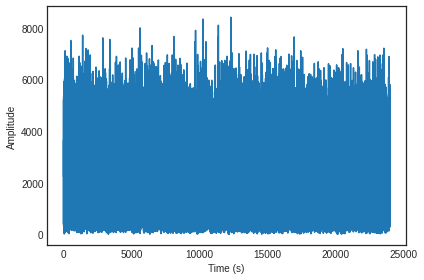

In [261]:
specMixUGEnhanced.plot()
decorate(xlabel="Time (s)", ylabel="Amplitude")

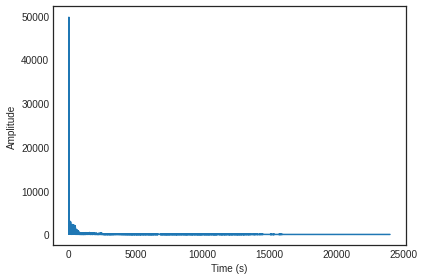

In [262]:
specMixBrownian.plot()
decorate(xlabel="Time (s)", ylabel="Amplitude")

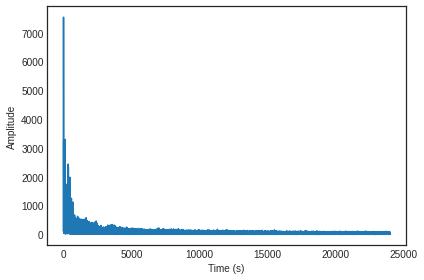

In [263]:
specMixPink.plot()
decorate(xlabel="Time (s)", ylabel="Amplitude")

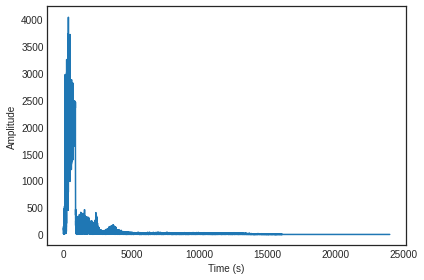

In [264]:
specMixChirp.plot()
decorate(xlabel="Time (s)", ylabel="Amplitude")

### **Remove Chirp by Using high_pass**

In [265]:
mixChirp.make_audio()

In [266]:
## this way chirp is removed
specMixChirp.high_pass(cutoff=880)

In [267]:
specMixChirp.make_wave().make_audio()